In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers
import tensorflow as tf


In [6]:
from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(2)  # Updated to work with TensorFlow 2.x


In [7]:
# prompt: import dataset the location of the dataset is /content/drive/MyDrive/emotions.csv

df = pd.read_csv('/content/drive/MyDrive/emotions.csv')

In [9]:
df.head()

,Sentences,Label
0,मेरे ट्रैन का बुकिंग फेल हो रहा है बार बार,angry
1,मेरे फ्लाइट का बुकिंग फेल हो रहा है बार बार,angry
2,क्या बेकार की बातें कर रहे हो,angry
3,क्या बताओ यार मूड ही ख़राब है,angry
4,आप ऐसे कैसे मेरा पैसा काट सकते हो,angry


In [10]:
df.shape

(513, 2)

In [11]:
y = df["Label"]
X = df.drop(["Label"], axis = 1)

In [13]:
from sklearn.model_selection import train_test_split

# 70/15/15 split for train/test/validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

# Display a few samples to verify
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())
print(X_val.head())
print(y_val.head())


                                       Sentences
171  आये होये ! ! ! आज तो तूने दिल जीत लिया भाई 
226                           शुक्रिया तुम्हारा 
24      यार बार बार इंडिका ही क्यों बुक होता है 
33                ऐसे कैसे चैनल्स बंद कर दिए आप 
167               वाह ! ! ! सस्ती चीज बता दी यार
171    happy
226    happy
24     angry
33     angry
167    happy
Name: Label, dtype: object
                                Sentences
47   बहुत कन्फुसिंग इंटरफ़ेस है तुम्हारा 
346                   अभी के अभी बुक करो 
284              क्या रिचार्ज करना चाहिए 
221                     तुम बढ़िया हो यार 
504         पैसे अभी तक वापस नहीं आए यार 
47       angry
346    neutral
284    neutral
221      happy
504        sad
Name: Label, dtype: object
                                  Sentences
356  और क्या क्या कर सकते हो तुम मेेरे लिए 
271                                अरे वाह 
186              आ हा ! सारथी तुम बेस्ट हो 
398                 फटा फट एक कैब बुक करना 
231                              अरे बढ़ि

In [14]:
tk = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n')

all_sentences = X_train + X_test + X_val

tk.fit_on_texts(X['Sentences'])

# + 1 for unknown token
vocab_size = len(tk.word_index) +1

X_train_seq = tk.texts_to_sequences(X_train['Sentences'])
X_test_seq = tk.texts_to_sequences(X_test['Sentences'])
X_val_seq = tk.texts_to_sequences(X_val['Sentences'])
# Initializing max length of sentence to 20 words
max_length = 20

In [15]:
tk.word_index

{'है': 1,
 'क्या': 2,
 'हो': 3,
 'नहीं': 4,
 'यार': 5,
 'कर': 6,
 'ये': 7,
 'बहुत': 8,
 'में': 9,
 'से': 10,
 'एक': 11,
 'की': 12,
 'होटल': 13,
 'का': 14,
 'कैब': 15,
 'था': 16,
 'तुम': 17,
 'के': 18,
 'बुक': 19,
 'काम': 20,
 'मेरे': 21,
 'बार': 22,
 'गया': 23,
 'मै': 24,
 'रहा': 25,
 'मेरा': 26,
 'अच्छा': 27,
 'फ्लाइट': 28,
 'पैसे': 29,
 'कैसे': 30,
 'सर्विस': 31,
 'मुझे': 32,
 'ही': 33,
 'तो': 34,
 'और': 35,
 'भाई': 36,
 'एप': 37,
 'आ': 38,
 'थी': 39,
 'मेरी': 40,
 'कुछ': 41,
 'रिचार्ज': 42,
 'ट्रैन': 43,
 'तक': 44,
 'क्यों': 45,
 'लिए': 46,
 'अकाउंट': 47,
 'भी': 48,
 'समझ': 49,
 'एप्प': 50,
 'अरे': 51,
 'टिकट': 52,
 'करने': 53,
 'कब': 54,
 'बात': 55,
 'ने': 56,
 'दिया': 57,
 'धन्यवाद': 58,
 'वाह': 59,
 'आज': 60,
 'तुमने': 61,
 'तुमसे': 62,
 'काफी': 63,
 'दो': 64,
 'बुकिंग': 65,
 'बेकार': 66,
 'रहे': 67,
 'जल्दी': 68,
 'कितना': 69,
 'करो': 70,
 'टाइम': 71,
 'ड्राइवर': 72,
 'मैं': 73,
 'आया': 74,
 'तुम्हारा': 75,
 'सही': 76,
 'को': 77,
 'हु': 78,
 'कोई': 79,
 'किया': 80,
 'तूने': 81,


In [16]:
print(vocab_size)


686


In [17]:
X_train_seq

[[457, 458, 60, 34, 81, 196, 267, 150, 36],
 [145, 75],
 [5, 22, 22, 353, 33, 45, 19, 176, 1],
 [125, 30, 88, 135, 6, 231, 92],
 [59, 192, 235, 222, 140, 5],
 [51, 7, 30, 94, 5],
 [2, 459, 6, 57, 81],
 [99, 402, 10, 403, 3, 95, 40],
 [5, 54, 94, 42, 21, 47, 14],
 [11, 147, 270, 190, 1],
 [305, 12, 212, 10, 209, 12, 79, 43, 52, 1],
 [7, 2, 132, 1],
 [223, 336, 22, 220, 12, 1, 337, 41, 338, 4, 339, 25],
 [13, 40, 325, 18, 293, 10, 4, 16],
 [40, 43, 71, 10, 116, 239, 1, 539],
 [149, 11, 65, 6, 131, 15, 12],
 [96, 182, 71, 550, 112, 120, 105],
 [15, 98, 56, 161, 651, 10, 55, 4, 12],
 [93, 42, 6, 225, 226, 10],
 [51, 7, 88, 45, 4, 38, 25, 427],
 [240],
 [13, 10, 628, 27, 4, 16],
 [2, 26, 11, 20, 555],
 [5, 2, 132, 6, 67, 3, 17],
 [2, 132, 228, 359],
 [122, 18, 46, 58],
 [2, 478, 20, 80, 1, 36],
 [196, 267, 150, 81],
 [40, 43, 14, 308, 211, 70],
 [124, 153, 121, 39, 2, 562],
 [113, 34, 20, 18, 392, 17],
 [28, 9, 547, 18, 46, 48, 41, 19, 6, 64],
 [13, 34, 102, 1],
 [11, 545, 19, 70],
 [29, 26

In [18]:
X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_length,padding='post')
X_val_seq_pad = pad_sequences(X_val_seq, maxlen=max_length,padding='post')


In [19]:
#padding the sequences to make all the input sequences of the same length
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_val_le = le.transform(y_val)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)
y_val_oh = to_categorical(y_val_le)

In [20]:

X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_length,padding='post')
X_val_seq_pad = pad_sequences(X_val_seq, maxlen=max_length,padding='post')

In [21]:
emb_dims = 256

model = Sequential()
model.add(Embedding(vocab_size, emb_dims, input_length=max_length, embeddings_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(LSTM(units = 16, dropout = 0.2,recurrent_dropout = 0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_seq_pad, y_train_oh, epochs = 128, batch_size = 256, validation_data=(X_val_seq_pad, y_val_oh), shuffle=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step - accuracy: 0.1981 - loss: 1.4032 - val_accuracy: 0.1212 - val_loss: 1.4072
Epoch 2/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.2726 - loss: 1.3965 - val_accuracy: 0.1212 - val_loss: 1.4071
Epoch 3/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2881 - loss: 1.3901 - val_accuracy: 0.1212 - val_loss: 1.4050
Epoch 4/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2957 - loss: 1.3872 - val_accuracy: 0.1212 - val_loss: 1.4014
Epoch 5/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2926 - loss: 1.3851 - val_accuracy: 0.1212 - val_loss: 1.3972
Epoch 6/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2775 - loss: 1.3833 - val_accuracy: 0.1212 - val_loss: 1.3927
Epoch 7/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2845 - loss: 1.3806 - val_accuracy: 0.1212 - val_loss: 1.3884
Epoch 8/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3416 - loss: 1.3786 - val_accuracy: 0.4091 - val_loss

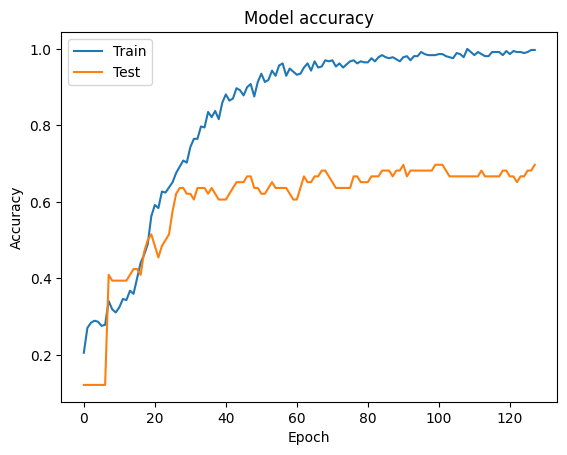

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 256)             │         175,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 16)                  │          17,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 579,470 (2.21 MB)

 Trainable params: 193,156 (754.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 386,314 (1.47 MB)

In [24]:
results = model.evaluate(X_test_seq_pad, y_test_oh)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5943 - loss: 2.0319
/n
Test accuracy of word embeddings model: 57.14%


In [29]:
model.save('my_model.h5')

In [30]:
# prompt: tokenizer and label encoder save

import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tk, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the label encoder
with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
# prompt: now import the downloaded model tokenizer and label encoder and create a prediction system where i can upload the sentence and get predicted sentiment

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load the saved model
model = tf.keras.models.load_model('my_model.h5')

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tk = pickle.load(handle)

# Load the label encoder
with open('label_encoder.pickle', 'rb') as handle:
    le = pickle.load(handle)


def predict_sentiment(sentence):
  """Predicts the sentiment of a given sentence.

  Args:
    sentence: The sentence to predict the sentiment of.

  Returns:
    The predicted sentiment label.
  """

  # Convert the sentence to a sequence of integers
  sequence = tk.texts_to_sequences([sentence])

  # Pad the sequence to a fixed length
  padded_sequence = pad_sequences(sequence, maxlen=20, padding='post')

  # Predict the sentiment
  prediction = model.predict(padded_sequence)[0]
  predicted_label_index = prediction.argmax()

  # Get the sentiment label from the label encoder
  predicted_label = le.inverse_transform([predicted_label_index])[0]

  return predicted_label



# Get user input and make a prediction
sentence = input("Enter a sentence: ")
predicted_sentiment = predict_sentiment(sentence)
print(f"Predicted sentiment: {predicted_sentiment}")

Enter a sentence: मैं तुमसे नहीं माँगता!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Predicted sentiment: angry
